In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [41]:
transactions_file=r"C:\Users\bmoha\OneDrive\Transactions pro.csv"
products_file = r"C:\Users\bmoha\OneDrive\Productspro.csv"
customers_file = r"C:\Users\bmoha\OneDrive\Customerspro.csv"

transactions_df = pd.read_csv(transactions_file)
products_df = pd.read_csv(products_file)
customers_df = pd.read_csv(customers_file)




In [49]:
# Initial exploration
print("Transactions Dataset Info:")
print(transactions_df.info())
print(transactions_df.head())

print("\nProducts Dataset Info:")
print(products_df.info())
print(products_df.head())

print("\nCustomers Dataset Info:")
print(customers_df.info())
print(customers_df.head())

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070     

In [51]:
# Merge datasets for a unified view
merged_df = transactions_df.merge(products_df, on='ProductID', how='left').merge(customers_df, on='CustomerID', how='left')

In [53]:
# Check for missing data
print("\nMissing Data:")
print(merged_df.isnull().sum())


Missing Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


In [55]:
# Generate summary statistics
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


C:\Users\bmoha\AppData\Local\Temp\ipykernel_10956\2150679382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


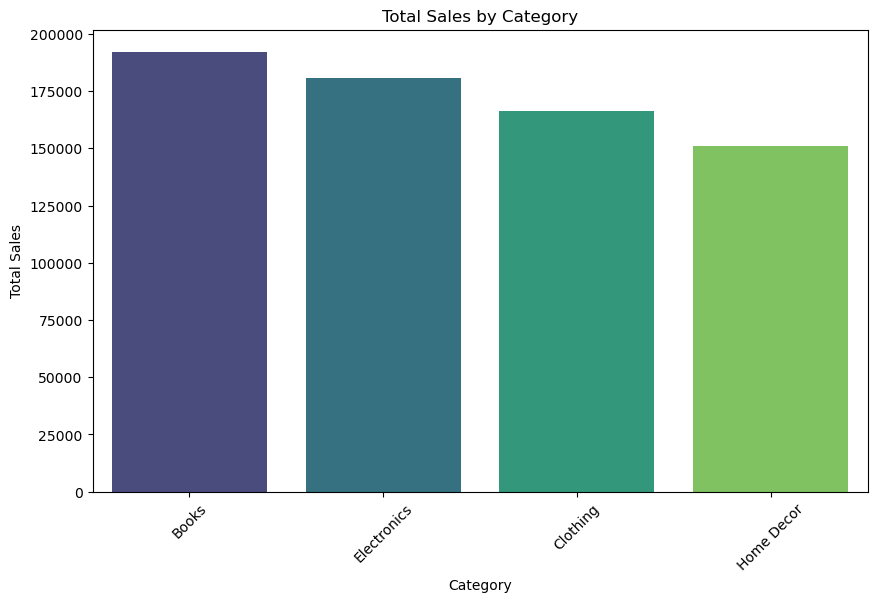

In [86]:
# Visualization 1: Sales by category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_10956\1865595422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')


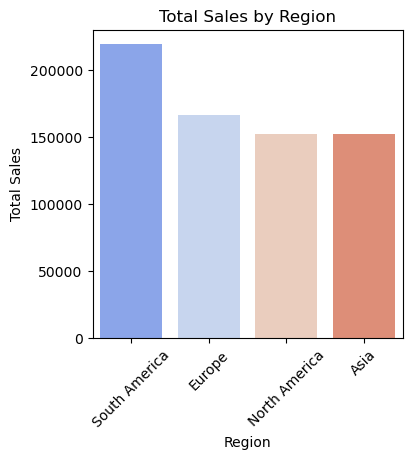

In [118]:
# Visualization 2: Sales by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\bmoha\AppData\Local\Temp\ipykernel_10956\243979892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette='Blues_r')


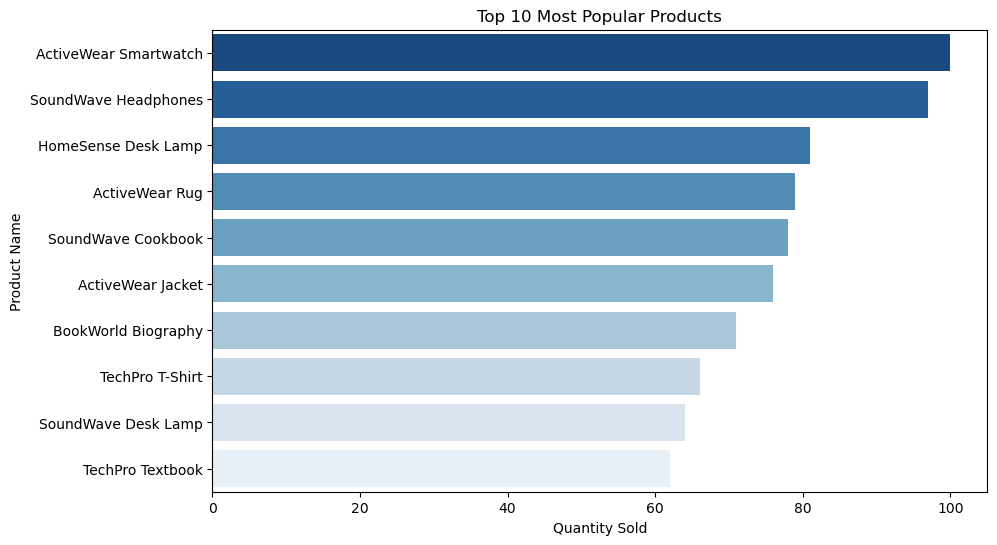

In [102]:
# Visualization 3: Most popular products
popular_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette='Blues_r')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

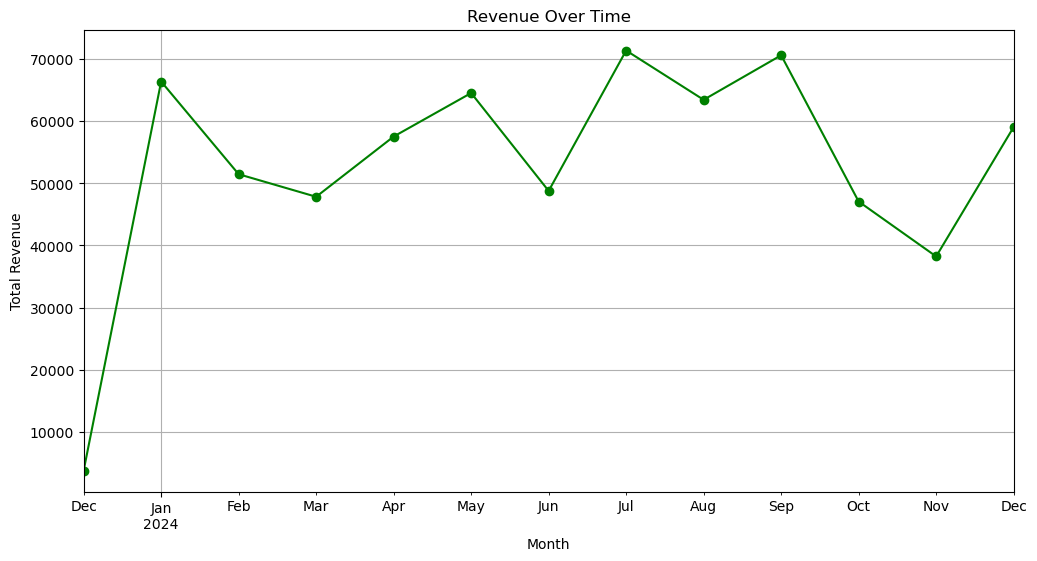

In [108]:
# Visualization 4: Revenue over time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
time_series = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
time_series.plot(kind='line', marker='o', color='green')
plt.title('Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid()
plt.show()

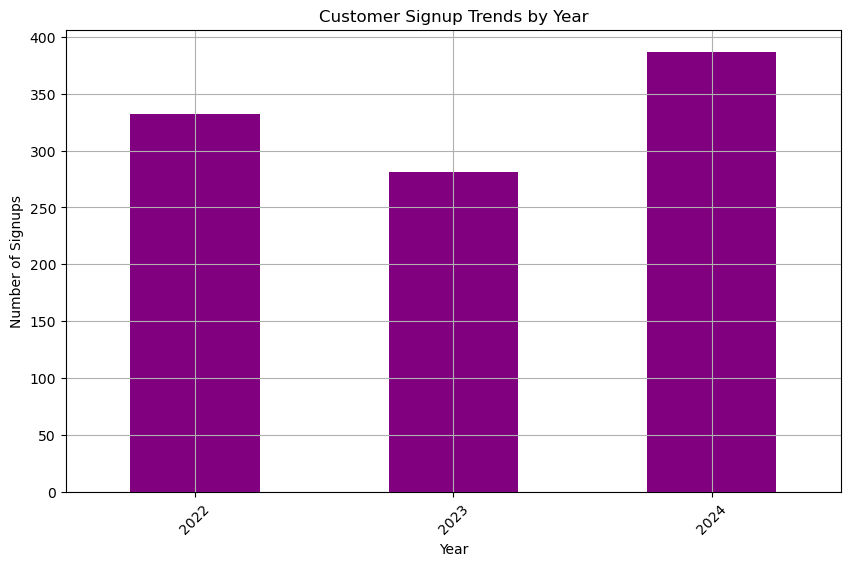

In [114]:
# Visualization 5: Customer signup trends
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
signup_trends = merged_df['SignupDate'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='purple')
plt.title('Customer Signup Trends by Year')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid()
plt.show()